<a href="https://colab.research.google.com/github/jmgjasongardner/DEEPJocksBox/blob/master/Jock's_Box_draft_11/10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jock's Box

**Organization:** Rice Data Science Club, DEEP Project Team

**Mentor:** Jason Gardner

**Mentee:** Aaron Chang, Kai Hung, Ankit Patel, Nathan Powell, Sanjay Rajasekhar, Daniel Sedano, Luke Stancil, Brian Xu, Jeffrey Zhong

**Data Set:** NBA Enhanced Box Score and Standings (2012-2018 Team Box Scores) https://www.kaggle.com/pablote/nba-enhanced-stats 

**Objective:** Craft a prediction model for win_rate based on the relationship between the frequency of effective 3-point shots and the win percentage of an NBA team. 

**How:** We need to split the dataset into a weighted average of three shots attempted per team out of their total shots attempted and their win percentage. 

Our explanatory variable *effective_three_point_percentage*, will be obtained by multiplying the fraction of three point shots attempted over total shots and the three point shot percentage made. 

Our response variable, *win_rate*, will be the win rate data of each team. 



In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

We will be using the python libraries seaborn, pandas, and matplotlib in our analysis. 

In [ ]:
nba_complete_df = pd.read_csv("/content/2012-18_officialBoxScore.csv")

Let's take a look at how our data is organized. 

In [ ]:
nba_complete_df.head()

,gmDate,gmTime,seasTyp,offLNm,offFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,teamMin,teamDayOff,teamPTS,teamAST,teamTO,teamSTL,teamBLK,teamPF,teamFGA,teamFGM,teamFG%,team2PA,team2PM,team2P%,team3PA,team3PM,team3P%,teamFTA,teamFTM,teamFT%,teamORB,teamDRB,teamTRB,teamPTS1,teamPTS2,teamPTS3,teamPTS4,teamPTS5,teamPTS6,teamPTS7,...,oppt2P%,oppt3PA,oppt3PM,oppt3P%,opptFTA,opptFTM,opptFT%,opptORB,opptDRB,opptTRB,opptPTS1,opptPTS2,opptPTS3,opptPTS4,opptPTS5,opptPTS6,opptPTS7,opptPTS8,opptTREB%,opptASST%,opptTS%,opptEFG%,opptOREB%,opptDREB%,opptTO%,opptSTL%,opptBLK%,opptBLKR,opptPPS,opptFIC,opptFIC40,opptOrtg,opptDrtg,opptEDiff,opptPlay%,opptAR,opptAST/TO,opptSTL/TO,poss,pace
0,2012-10-30,19:00,Regular,Brothers,Tony,WAS,East,Southeast,Away,Loss,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.25,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,...,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.00,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
1,2012-10-30,19:00,Regular,Smith,Michael,WAS,East,Southeast,Away,Loss,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.25,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,...,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.00,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
2,2012-10-30,19:00,Regular,Workman,Haywoode,WAS,East,Southeast,Away,Loss,240,0,84,26,13,11,10,19,90,32,0.3556,58,24,0.4138,32,8,0.25,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,...,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,0,58.0645,61.1111,0.5300,0.5,33.3333,66.6667,19.1466,7.8704,5.6217,8.4746,1.1899,74.00,61.6667,105.6882,94.4447,11.2435,0.4390,16.7072,1.0476,33.3333,88.9409,88.9409
3,2012-10-30,19:00,Regular,Brothers,Tony,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,...,0.4138,32,8,0.25,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4,46.1538,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409
4,2012-10-30,19:00,Regular,Smith,Michael,CLE,East,Central,Home,Win,240,0,94,22,21,7,5,21,79,36,0.4557,59,29,0.4915,20,7,0.35,22,15,0.6818,18,36,54,31,19,24,20,0,0,0,...,0.4138,32,8,0.25,20,12,0.6000,18,21,39,24,15,23,22,0,0,0,0,41.9355,81.2500,0.4251,0.4,46.1538,53.8462,11.6279,12.3678,11.2434,17.2414,0.9333,67.25,56.0417,94.4447,105.6882,-11.2435,0.3765,18.8679,2.0000,84.6154,88.9409,88.9409


Let's prepare some sub-data-frames to represent out data. We will want to take a look at the distribution of three pointers out of total field goals attempted by teams. But, we will deal with the teams aspect in a bit. 

In [ ]:
two_pointers_attempted = nba_complete_df.loc[:, "team2PA"]

teams = nba_complete_df.loc[:, "teamAbbr"]

three_pointers_made = nba_complete_df.loc[:, "team3PM"].astype(float)
three_pointers_attempted = nba_complete_df.loc[:, "team3PA"].astype(float)

# need to somehow add the three pointers and two points to count the total attempts
# total_attempted = two_pointers_attempted .add(three_pointers_attempted, fill_value = 0)

total_attempted = nba_complete_df.loc[:, "teamFGA"].astype(float)

proportion_three_pointers = three_pointers_attempted.divide(total_attempted)

proportion_three_pointers.columns = ["index", "%3A"]

# the name doesn't show up ugh....

proportion_three_pointers.head()

0    0.355556
1    0.355556
2    0.355556
3    0.253165
4    0.253165
dtype: float64

Now, we need to identify the win percentage of each team

In [ ]:
wins_df = nba_complete_df.loc[nba_complete_df.teamRslt == "Win"]
wins_df = wins_df.loc[:, ["teamAbbr"]].value_counts()
losses_df = nba_complete_df.loc[nba_complete_df.teamRslt == "Loss"]
losses_df = losses_df.loc[:, ["teamAbbr"]].value_counts()

proportion_wins_by_team_df = pd.DataFrame(wins_df / (wins_df + losses_df))

#again, doing this wrong

proportion_wins_by_team_df.rename(columns={"": "win_rate"}) 
# this is the dataframe of proportion wins!
proportion_wins_by_team_df.head()

Now we need to group our data by team names

  teamAbbr         0    teamFGA
0      ATL  0.322633  83.105691
1      BKN  0.302342  82.851626
2      BOS  0.298962  85.183978
3      CHA  0.276219  84.025763
4      CHI  0.255678  84.677048


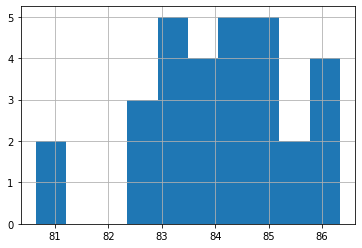

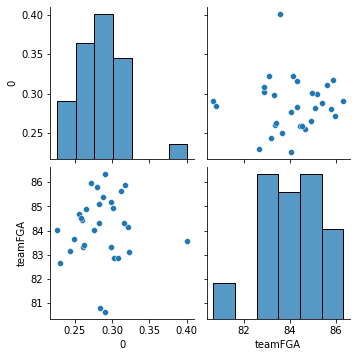

In [ ]:
#proportion_threes_by_team = pd.concat([teams, proportion_three_pointers, total_attempted, proportion_wins_by_team_df], axis=1, sort=False)

proportion_threes_by_team = pd.DataFrame(pd.concat([teams, proportion_three_pointers, total_attempted], axis=1, sort=False))
proportion_threes_by_team = pd.DataFrame(proportion_threes_by_team.groupby("teamAbbr").mean().reset_index())

# figure out a way to rename the data frame in column "0" 
proportion_threes_by_team.rename(columns={0: "%3A"})
# rename experiment ends.
print(proportion_threes_by_team.head())
proportion_threes_by_team["teamFGA"].hist(bins=10)

chart = sns.pairplot(data=proportion_threes_by_team)




Let's graph our data and see how the distributuon of three pointers shot across the league looks

Now, it's time to plot the data and see if we can find any potential relationships between the different variables.



*   Does more percentage three pointers attempted typically lead to better win rate? 
*   How does the league's general ratio of two pointers attempt vs. three pointers attempt look? 
*   Which teams are especially good for three point heavy strategies? Or are they all relatively doing well in terms of how their win rate fair for the average team adopting their strategy? 

Note that we are splitting teams into two categories
* 3 Point Heavy (>50% attempted shots are 3 pointers)
* 2 Point Heavy (<50% attempted shots are 2 pointers)




# Arranging Data by Test/Train and Uniform Season

Importing Libraries and Reading Initial File


Adding Season/Type Columns

In [ ]:
# import libraries 
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
# import your data 
df = pd.read_csv('2012-18_teamBoxScore.csv')
mthlist = [10,11,12,1]
seasons = []
wl = []
types = []

for index,row in df.iterrows():
    month = int(row["gmDate"][5:7])
    year = int(row["gmDate"][0:4])

    if month in mthlist:
      types.append("Train")
      if month != 1:
        seasons.append(year + 1)
      else:
        seasons.append(year)

    else:
      seasons.append(year)
      types.append("Test")
    if row["teamRslt"] == "Loss":
      wl.append(0)
    elif row["teamRslt"] == "Win":
      wl.append(1)

try:
  df.insert(df.shape[1],"season",seasons)
except:
  df.loc[:,"season"] = seasons
try:
  df.insert(df.shape[1],"type",types)
except:
  df.loc[:,"type"] = types
df.insert(df.shape[1],"wlNum",wl)
print(df)

           gmDate gmTime  seasTyp    offLNm1  ...      pace season   type wlNum
0      2012-10-30  19:00  Regular   Brothers  ...   88.9409   2013  Train     0
1      2012-10-30  19:00  Regular   Brothers  ...   88.9409   2013  Train     1
2      2012-10-30  20:00  Regular  McCutchen  ...   94.9832   2013  Train     0
3      2012-10-30  20:00  Regular  McCutchen  ...   94.9832   2013  Train     1
4      2012-10-30  22:30  Regular     Foster  ...   91.5790   2013  Train     1
...           ...    ...      ...        ...  ...       ...    ...    ...   ...
14753  2018-04-11  10:30  Regular  Garretson  ...  101.7513   2018   Test     0
14754  2018-04-11  10:30  Regular     Cutler  ...   97.2708   2018   Test     0
14755  2018-04-11  10:30  Regular     Cutler  ...   97.6761   2018   Test     1
14756  2018-04-11  10:30  Regular      Tiven  ...   91.6047   2018   Test     0
14757  2018-04-11  10:30  Regular      Tiven  ...   91.9864   2018   Test     1

[14758 rows x 126 columns]


In [ ]:
predictor_stats = df[["teamAbbr","teamEDiff","teamASST%","team2P%","team3P%","teamFT%","opptTO%","season","type","pace","wlNum"]]
predictor_stats["Q4Diff"] = df["teamPTS4"] - df["opptPTS4"]
predictor_stats

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,teamAbbr,teamEDiff,teamASST%,team2P%,team3P%,teamFT%,opptTO%,season,type,pace,wlNum,Q4Diff
0,WAS,-11.2435,81.2500,0.4138,0.2500,0.6000,19.1466,2013,Train,88.9409,0,2
1,CLE,11.2435,61.1111,0.4915,0.3500,0.6818,11.6279,2013,Train,88.9409,1,-2
2,BOS,-13.6866,61.5385,0.5323,0.4615,0.8214,7.9145,2013,Train,94.9832,0,4
3,MIA,13.6866,58.1395,0.5556,0.5000,0.8125,15.4859,2013,Train,94.9832,1,-4
4,DAL,8.7356,55.0000,0.5000,0.3333,0.7778,13.3792,2013,Train,91.5790,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
14753,LAC,-14.7419,65.8537,0.5385,0.3333,0.4286,15.1732,2018,Test,101.7513,0,3
14754,UTA,-9.2142,54.5455,0.3788,0.3478,0.7917,9.4304,2018,Test,97.2708,0,12
14755,POR,9.2142,46.3415,0.4923,0.3750,0.6875,13.0936,2018,Test,97.6761,1,-12
14756,HOU,-14.1326,35.4839,0.5000,0.2826,0.6667,11.0220,2018,Test,91.6047,0,3


In [ ]:
for year in range(2013,2019):
  year_df = predictor_stats.loc[predictor_stats.season == year]
  year_train = year_df.loc[year_df.type == 'Train']
  year_test = year_df.loc[year_df.type == 'Test']
  year_train = year_train.drop(['season', 'type'], axis = 1)
  year_test = year_test.drop(['season', 'type'], axis = 1)

  
  train_by_team = pd.DataFrame(year_train.groupby("teamAbbr").mean().reset_index())
  test_by_team = pd.DataFrame(year_test.groupby("teamAbbr").mean().reset_index())
  #print(train_by_team.head)

  
  regression = LinearRegression().fit(train_by_team.drop(['wlNum', 'teamAbbr'], axis = 1), train_by_team['wlNum'])

  coeff_df = pd.DataFrame(regression.coef_, train_by_team.drop(['wlNum', 'teamAbbr'], axis = 1).columns, columns=['Coefficient'])

  #ax1 = train_by_team.plot.scatter(x='pace', y='wlNum')

  print(coeff_df)
  #print(test_by_team)

  y_pred = regression.predict(test_by_team.drop(['wlNum', 'teamAbbr'], axis = 1))

  actual_vs_prediction_df = pd.DataFrame({'Team': test_by_team['teamAbbr'], 'Actual': test_by_team['wlNum'], 'Predicted': y_pred})
  mse = metrics.mean_squared_error(100*actual_vs_prediction_df['Actual'], 100*actual_vs_prediction_df['Predicted'])
  print(actual_vs_prediction_df)
  print(mse)

           Coefficient
teamEDiff     0.031738
teamASST%     0.000639
team2P%      -0.698221
team3P%       0.490663
teamFT%       0.144119
opptTO%       0.011254
pace          0.000282
Q4Diff       -0.002533
   Team    Actual  Predicted
0   ATL  0.486486   0.474059
1   BKN  0.611111   0.568465
2   BOS  0.527778   0.512662
3   CHA  0.270270   0.140926
4   CHI  0.459459   0.416607
5   CLE  0.305556   0.360151
6   DAL  0.611111   0.554488
7   DEN  0.800000   0.718602
8   DET  0.333333   0.257211
9    GS  0.500000   0.542244
10  HOU  0.588235   0.644551
11  IND  0.628571   0.717781
12  LAC  0.628571   0.634306
13  LAL  0.694444   0.476001
14  MEM  0.729730   0.690038
15  MIA  0.925000   0.834264
16  MIL  0.368421   0.429023
17  MIN  0.350000   0.415616
18   NO  0.333333   0.356020
19   NY  0.666667   0.647013
20  OKC  0.694444   0.818766
21  ORL  0.162162   0.104104
22  PHI  0.405405   0.395106
23  PHO  0.250000   0.188930
24  POR  0.270270   0.305937
25   SA  0.617647   0.622507
26  SAC  0